#Import Libraries

In [ ]:
import string
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from nltk.corpus import stopwords as stopwords_eng
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
from time import time  # To time our operations

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import gensim 
import logging
import fasttext
import multiprocessing

from gensim.models import FastText as FT_gensim
from gensim.test.utils import datapath
from gensim.models.wrappers import FastText as FT

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopwords

In [ ]:
#Import the embedding dataset

In [2]:
review_df = pd.read_excel("./Embedding_Datasets/BYU_TokPed.xlsx").astype(str) #You can change it with your own
review_df

,review
0,Run aplikasi Force Close terus padahal sebelum...
1,[ulasan terjujur yang anda lihat] masih ada bu...
2,Pengalaman pakai provider by u. Mungkin karena...
3,"Jaringan ampas btw, speednya sama kaya kartu 3..."
4,Bay.u saya kenapa tdk bisa iya aplikasi bay .u...
...,...
19726,Ko parah si? Mau ganti nomor tlfn kenapa harus...
19727,"Toko online paling menjijikan, kenapa kalian m..."
19728,Hai kenalin nama ku chio si aku suka banget sh...
19729,Kebanyakan Harus di Update lagi Update lagi te...


In [ ]:
# kamus_kata_dasar = pd.read_csv("F:/SKRIPSI_Temp/Deployment/Dataset/kata_dasar_kbbi.csv").astype(str)
# kata_dasar = kamus_kata_dasar['a']
# kata_dasar

#Preprocessing

In [4]:
review_user = review_df['review'].astype(str)

#Lower Case
review_user = review_user.apply(lambda x: x.lower())

#Remove Number
review_user = review_user.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
review_user = review_user.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#punctuation
review_user = review_user.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

#tokenizing
review_user = review_user.apply(lambda x: nltk.tokenize.word_tokenize(x))
#stopword removal optional
# factory = StopWordRemoverFactory()
# stopword = factory.create_stop_word_remover()
# review_user = review_user.apply(lambda x: stopword.remove(x))

#stemming optional
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# review_user = review_user.apply(lambda x: stemmer.stem(x))

review_user.head()

0    [run, aplikasi, force, close, terus, padahal, ...
1    [ulasan, terjujur, yang, anda, lihat, masih, a...
2    [pengalaman, pakai, provider, by, u, mungkin, ...
3    [jaringan, ampas, btw, speednya, sama, kaya, k...
4    [bay, u, saya, kenapa, tdk, bisa, iya, aplikas...
Name: review, dtype: object

#Set the FastText Hypterparameter & Training the FastText Pre-trained Model

In [5]:
model_gensim = FT_gensim(size=200, 
                         negative=5, 
                         min_count=1, 
                         min_n=0, 
                         max_n=1, 
                         sg=1, 
                         sorted_vocab=1, 
                         word_ngrams=1, 
                         window=5, 
                         callbacks=(),
                        ns_exponent=0.75, 
                         cbow_mean=0, 
                         workers=4, 
                         alpha=0.1, 
                         min_alpha=0.025)

In [6]:
model_gensim.build_vocab(review_user)

In [7]:
total_examples = model_gensim.corpus_count
model_gensim.train(
    sentences=review_user,
    total_examples=total_examples, 
    epochs = 75
)

In [8]:
print(model_gensim)

FastText(vocab=13530, size=200, alpha=0.1)


#Export the model and test it

In [9]:
model_gensim.save('saved_model_gensim_GABUNGAN_200.bin') #You can change it with your own file name
loaded_model = FT_gensim.load('saved_model_gensim_GABUNGAN_200.bin')
print(loaded_model)

FastText(vocab=13530, size=200, alpha=0.1)


In [10]:
print('kecewa' in loaded_model.wv.vocab)
print('mantap' in loaded_model.wv.vocab)
print(model_gensim.wv['jelek'])
print(model_gensim.wv['bagus'])

True
True
[ 2.0026426  -1.6984787   3.538249   -2.0304477  -0.04546325  2.3876767
  1.7378687  -1.7050184  -1.3764547   1.1570889   0.9219732   1.5332056
  1.3690572  -0.68590283 -0.15111144 -1.737833   -0.7261935   0.6605806
 -2.432791   -0.8243064  -1.44249    -2.1040905  -1.6888895  -0.8353446
 -1.0407649   0.04778353 -0.7105697  -1.863659   -0.21867166  1.5721191
 -0.36214507 -1.9888777  -0.75041485  0.796098   -0.71537304 -1.2331996
 -1.8309044   2.4964945   0.94335985 -1.8478136   3.3874948  -0.8632286
 -0.02491447 -2.1305869  -2.480971   -0.25692692 -1.9347177   3.3759787
 -0.27064696  1.3710409  -3.1539936  -1.1008539   2.0317023   0.45729384
  1.4461693   1.6916136   0.8615579  -2.2682161  -1.3537146   0.6467468
  1.2949466   1.4584037   0.23247027 -1.5383915   2.04098     1.7247138
  0.6147504  -1.3056042  -2.420288   -0.38292924 -0.25590086 -0.6762977
  0.7640104   1.3404409  -4.1316733  -0.6271222  -1.3022836   1.7915688
  1.8484489  -0.16430652  1.4064709   2.7148702   2.6

In [20]:
loaded_model.wv.similarity("baik", "baik")

1.0

In [12]:
loaded_model.wv.distance("mantap", "jelek")

0.7772664725780487

In [13]:
loaded_model.wv.most_similar(positive="jelek", topn=5)

[('jelekjelek', 0.9626588821411133),
 ('jlek', 0.9182401895523071),
 ('jeleeek', 0.9030128717422485),
 ('terjelek', 0.9025035500526428),
 ('jelekin', 0.8979717493057251)]

In [14]:
loaded_model.wv.most_similar_cosmul(positive="guoblok", negative=None, topn=5)

[('goblok', 0.7360547780990601),
 ('goblokk', 0.7269515991210938),
 ('gblok', 0.7219038009643555),
 ('golok', 0.7193354368209839),
 ('bloko', 0.7172606587409973)]

In [15]:
#JUST TEST FOR CLUSTERING???
keys = ['bagus', 'jelek']

print("=====POSITIVE=====")
for word in keys:
    for similar_word, _  in loaded_model.wv.most_similar(positive=word, topn=5, restrict_vocab=1000):
        print(word + " => " + similar_word)

print("=====NEGATIVE=====")
for word in keys:
    for similar_word, _  in loaded_model.wv.most_similar(negative=word, topn=5, restrict_vocab=1000):
        print(word + " => " + similar_word)

print("=====BY WORD=====")
for word in keys:
    for similar_word, _  in loaded_model.wv.similar_by_word(word, topn=5, restrict_vocab=1000):
        print(word + " => " + similar_word)
        
print("=====COSMUL APA ITU=====")
for word in keys:
    for similar_word, _  in loaded_model.wv.most_similar_cosmul(word, topn=5):
        print(word + " => " + similar_word)

print("=====BY VECTOR=====")
for word in keys:
    for similar_word, _  in loaded_model.wv.similar_by_vector(loaded_model.wv[word], topn=5, restrict_vocab=1000):
        print(word + " => " + similar_word)

=====POSITIVE=====
bagus => buang
bagus => gb
bagus => bug
bagus => gabisa
bagus => sebagai
jelek => kesel
jelek => kejelasan
jelek => semenjak
jelek => jelas
jelek => lelet
=====NEGATIVE=====
bagus => terjadi
bagus => pdhl
bagus => kesalahan
bagus => tiket
bagus => the
jelek => pusat
jelek => tulisan
jelek => bantuan
jelek => atas
jelek => datang
=====BY WORD=====
bagus => buang
bagus => gb
bagus => bug
bagus => gabisa
bagus => sebagai
jelek => kesel
jelek => kejelasan
jelek => semenjak
jelek => jelas
jelek => lelet
=====COSMUL APA ITU=====
bagus => bagusbagus
bagus => baguss
bagus => baguus
bagus => bgus
bagus => bagusi
jelek => jelekjelek
jelek => jlek
jelek => jeleeek
jelek => terjelek
jelek => jelekin
=====BY VECTOR=====
bagus => bagus
bagus => buang
bagus => gb
bagus => bug
bagus => gabisa
jelek => jelek
jelek => kesel
jelek => kejelasan
jelek => semenjak
jelek => jelas


In [16]:
similar_words = {search_term: [item[0] for item in loaded_model.wv.most_similar([search_term], topn=5)]
                for search_term in ['mantap', 'keren', 'bagus', 'jelek', 'parah', 'cepat']}
similar_words

{'mantap': ['mantap😊😍🤩', 'mantaap', 'mantapp', 'mntap', 'paman'],
 'keren': ['kreeen', 'kereen', 'kereenn', 'kerenn', 'kren'],
 'bagus': ['bagusbagus', 'baguss', 'baguus', 'bgus', 'bagusi'],
 'jelek': ['jelekjelek', 'jlek', 'jeleeek', 'terjelek', 'jelekin'],
 'parah': ['paraah', 'paraha', 'parahâ³', 'harap', 'parahh'],
 'cepat': ['capet', 'pecat', 'cepatt', 'cept', 'pecepat']}

/home/administrator/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/administrator/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129321 missing from current font.
  font.set_text(s, 0, flags=flags)


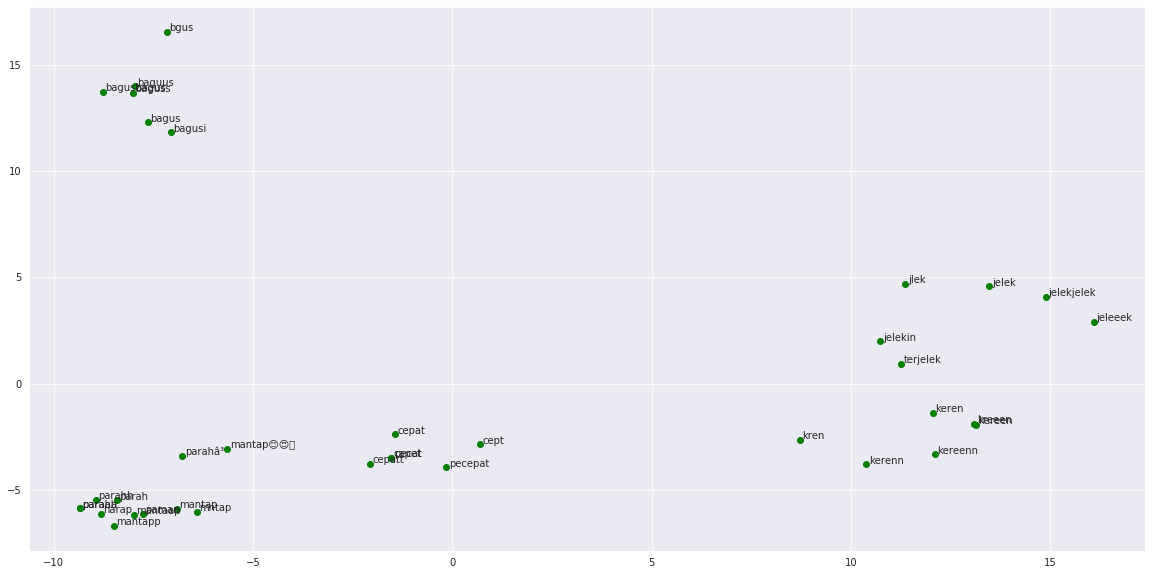

In [17]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = loaded_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 10))
plt.scatter(P[:, 0], P[:, 1], c='green', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')